In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



## Apply Euler method to get the numerical solution of predator-prey dynamics (Lotka-Volterra Equations)
* one time step is 0.05 day, for 200 days projection, the other with 0.5 day as time step, but project 3 days forward
* plot phase plane, and time-series

4001
7


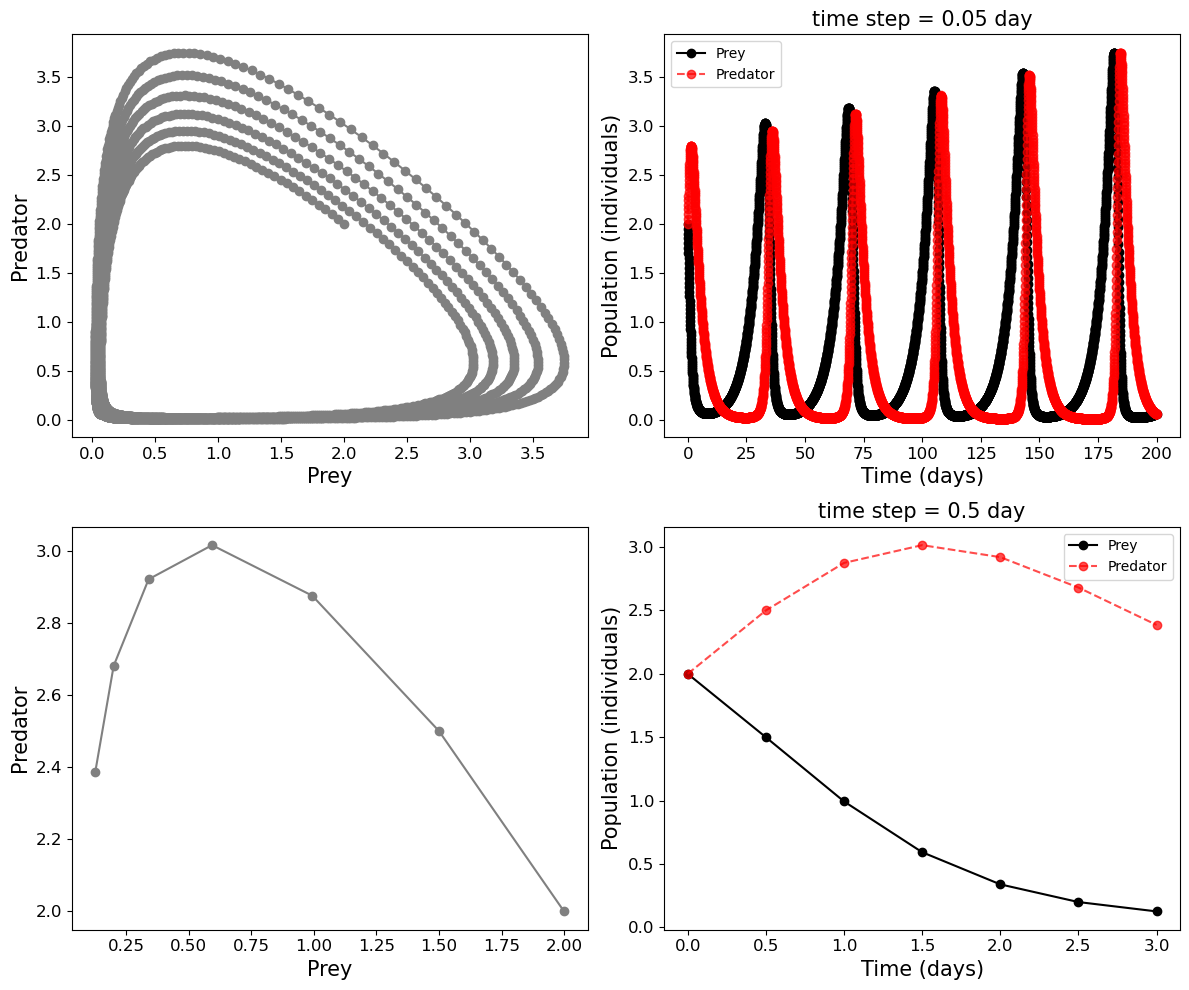

In [2]:
plt.close()
plt.figure(figsize=(12, 10))
fig_dir = "E:\OneDrive\EcoSysModel\plot"

fs =15 # font size

steps = [0.05, 0.5] # Δt: 0.05 day, 0.5 
days = [200, 3.0] # projection days

# coefficient values
alpha = 0.2
beta = 0.35
gama = 0.3
theta = 0.4

X0 = 2 # initial population for prey   
Y0 = 2  # initial population for predator

# color
c = ['black','red']

# create for loop
n =1
for i, dt in enumerate(steps):
   
    X = [X0]   # array for prey population
    Y = [Y0]       # array for predator population
    t = np.arange(0, days[i] + dt, dt)  # Generate time array based on time step
    print(np.size(t))
    # Calculate population using the finite difference method
    for _ in range(len(t) - 1):
        x = X[-1] * (1 + dt * (alpha - beta *Y[-1] ))  
        y = Y[-1] * (1 + dt * (-(gama) + theta * X[-1] ))
        X.append(x)
        Y.append(y)
    
    plt.subplot(2,2,n)    
    plt.plot(X, Y, marker = 'o', color = 'gray')
    plt.xlabel('Prey', fontsize = fs)
    plt.ylabel('Predator', fontsize = fs)
    plt.tick_params(axis='both', labelsize=12)
    
    n +=1
    plt.subplot(2,2,n)
    plt.plot(t, X, marker = 'o', color = c[0], label='Prey')
    plt.plot(t, Y, marker = 'o', color = c[1], linestyle='dashed', alpha=0.7, label='Predator')    
    plt.xlabel('Time (days)', fontsize = fs)
    plt.ylabel('Population (individuals)', fontsize = fs)
    plt.title(f'time step = {dt} day', fontsize = fs)
    plt.tick_params(axis='both', labelsize=12)
    plt.legend()
    n +=1    
    
plt.tight_layout()
# save plot
plt.savefig(f'{fig_dir}/predtor_prey_Euler_Method.png', bbox_inches='tight', dpi = 300)
plt.show()

# Plot the predator and prey population time evolution from real data 

<Figure size 1000x1000 with 0 Axes>

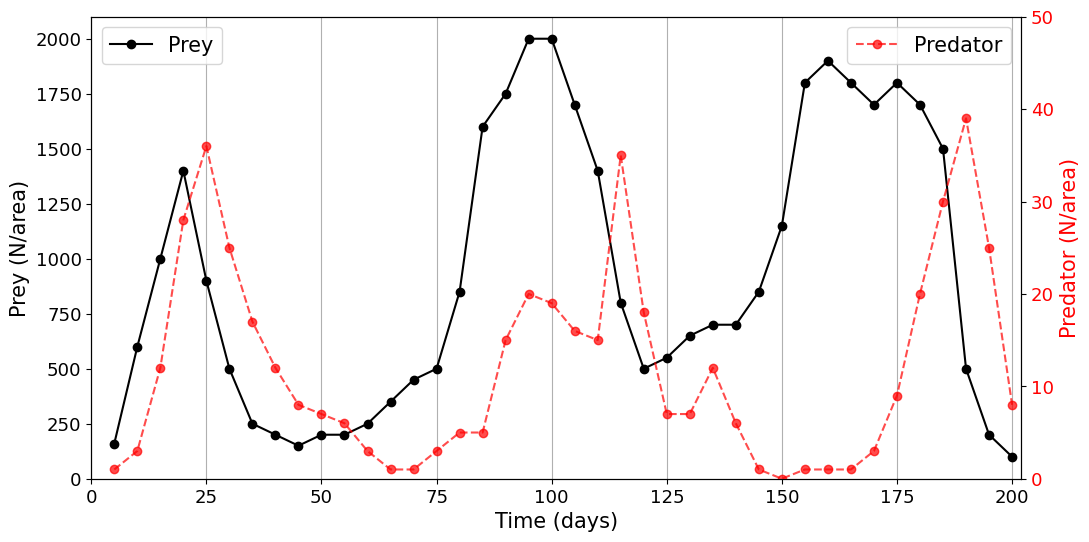

In [3]:
# read data
df = pd.read_csv('E:\OneDrive\EcoSysModel\data\ProblemSet2_Numbers_Table.csv', header=0, skiprows= [1] )

plt.close()
plt.figure(figsize=(10, 10))

fs = 15  # Font size

fig, ax1 = plt.subplots(figsize=(12, 6))  # Create main figure and first axis

# Plot Prey on the left y-axis
ax1.plot(df.Time, df.Prey, marker='o', color=c[0], label='Prey')
ax1.set_xlabel('Time (days)', fontsize=fs)
ax1.set_ylabel('Prey (N/area)', fontsize=fs, color=c[0])
ax1.tick_params(axis='y', labelcolor=c[0])  # Set tick colors to match the line
ax1.tick_params(axis='both', labelsize=13)
ax1.set_ylim(0, 2100)
ax1.set_xlim(0, 202)
ax1.grid(True, which='major', axis='x')


# Create second y-axis for Predator population
ax2 = ax1.twinx()
ax2.plot(df.Time, df.Predator, marker='o', linestyle='dashed', color=c[1], alpha=0.7, label='Predator')
ax2.set_ylabel('Predator (N/area)', fontsize=fs, color=c[1])
ax2.tick_params(axis='y', labelcolor=c[1],labelsize=13)  # Set tick colors to match the line
ax2.set_ylim(0, 50)

# Add legends
ax1.legend(loc='upper left', fontsize=fs)
ax2.legend(loc='upper right', fontsize=fs)
# save plot
plt.savefig(f'{fig_dir}/predtor_prey_real_field_data.png', bbox_inches='tight', dpi = 300)
plt.show()


## Apply Generalized Gause Model 



In [4]:
# read observational data

df = pd.read_csv('E:\OneDrive\EcoSysModel\data\ProblemSet2_Numbers_Table.csv', header=0, skiprows= [1] )

time_obs = df['Time'].values
prey_obs = df['Prey'].values
pred_obs = df['Predator'].values

"""from the observation, estimate prey growth rate"""

condition = (prey_obs[:-1] < np.max(prey_obs) / 2) & (np.diff(prey_obs) > 50)

indices = np.where(condition)[0]
# print("the indices are: ", indices)

# Calculate r = (X_(i+1) - X_i) / ((t_(i+1) - t_i) * X_i)
r_values = []
for i in indices:
    if i + 1 < len(time_obs):  
        r = (prey_obs[i + 1] - prey_obs[i]) / ((time_obs[i + 1] - time_obs[i]) * prey_obs[i])  # Euler method
        r_values .append(r)
r_avg = round(np.mean(r_values), 3)  # Round to 2 decimal places
r_stdv = round(np.std(r_values), 3)   # Round to 2 decimal places

print(f"The average specific growth rate for prey is: {r_avg}")
print(f"The standard deviation of r is: {r_stdv }")

The average specific growth rate for prey is: 0.143
The standard deviation of r is: 0.151


In [5]:
"""from the observation, estimate predator decay rate """
condition = np.diff(pred_obs) < -4

# Get indices where the condition is met
indices = np.where(condition)[0]
# print("The indices are: ", indices)

# Calculate gamma = (Y_(i+1) - Y_i) / ((t_(i+1) - t_i) * Y_i)
gamma_values = []
for i in indices:
    if i + 1 < len(time_obs):  # Ensure there is a next value to compute
        gamma = (pred_obs[i + 1] - pred_obs[i]) / ((time_obs[i + 1] - time_obs[i]) * pred_obs[i]) # Euler method
        gamma_values.append(gamma)

# Calculate the average gamma and standard deviation of gamma_values
gamma_avg = round(np.mean(-1 * np.array(gamma_values)), 3)  # Round to 2 decimal places
gamma_stdv = round(np.std(-1 * np.array(gamma_values)), 3)  # Round to 2 decimal places

print(f"The average specific decay rate for predator is: {gamma_avg}")
print(f"The standard deviation of gamma is: {gamma_stdv}")

The average specific decay rate for predator is: 0.098
The standard deviation of gamma is: 0.036


* use solve_ivp to solve the equation

Optimized Parameters:
 r=0.2940, K=1917.5, a=0.1026, h=0.0102, e=0.0321, gamma=0.1030


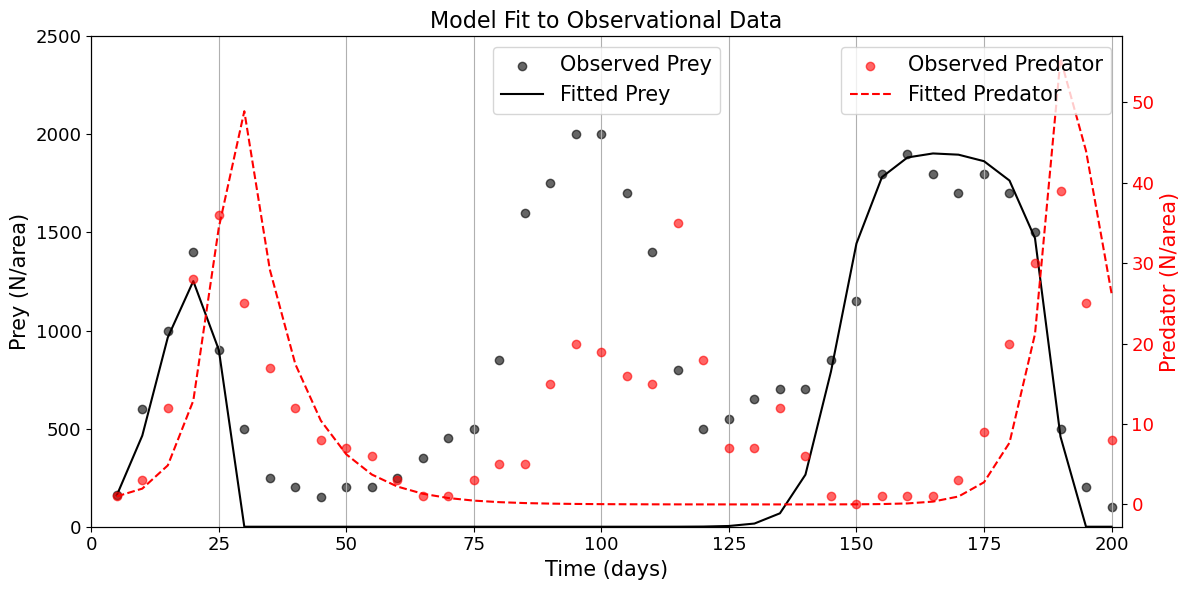

In [6]:
# Initial conditions
X0 = prey_obs[0]  # Initial prey population based on observation
Y0 = pred_obs[0]   # Initial predator population based on observation
t_span = (time_obs[0], time_obs[-1])  # Time range
t_eval = np.linspace(time_obs[0], time_obs[-1], len(time_obs))  # Time points for evaluation


# Define the Generalized Gause Model (GGM)
def ggm(t, z, params):    
    X, Y = z  # Prey (X) and Predator (Y)
    r, K, a, h, e, gamma = params
    
    g_X = r * (1 - X / K)  # Logistic growth
    # p_X = (a * X**2) / (1 + h * X**2)  # Type III (sigmoidal) response
    p_X = (a * X) / (1 + h * X)  # Type II functional response
    q_X = e * p_X  # Assimilation into predator

    dXdt = X * g_X - Y * p_X  # Prey equation
    dYdt = Y * (-gamma + q_X)  # Predator equation

    return [dXdt, dYdt]

# Solve the model given parameter values
def solve_model(params):
    from scipy.integrate import solve_ivp
    sol = solve_ivp(ggm, (time_obs[0], time_obs[-1]), [prey_obs[0], pred_obs[0]],
                    t_eval=time_obs, args=(params,), method='RK45')
    return sol.y  # Returns prey and predator solutions

# Define an error function for optimization
def error_function(params):
    prey_model, pred_model = solve_model(params)
    return np.linalg.norm(prey_obs - prey_model) + np.linalg.norm(pred_obs - pred_model)  # Sum of L2 errors

from scipy.optimize import minimize
# Initial guess for parameters

param_guess = [r_avg+r_stdv, 2000, 0.1, 0.01, 0.034, gamma_avg]  # [r, K, a, h, e, gamma]

# Parameter bounds
bounds = [(r_avg-r_stdv, r_avg+r_stdv), (500, 3000), (0.01, 1.0), (0.01, 1.0), (0.01, 1.0), (gamma_avg-gamma_stdv, gamma_avg+gamma_stdv)]
# Optimize parameters using least squares
opt_result = minimize(error_function, param_guess, bounds=bounds, method='Nelder-Mead')

# Extract optimized parameters
opt_params = opt_result.x
r_opt, K_opt, a_opt, h_opt, e_opt, gamma_opt = opt_params
print(f"Optimized Parameters:\n r={r_opt:.4f}, K={K_opt:.1f}, a={a_opt:.4f}, h={h_opt:.4f}, e={e_opt:.4f}, gamma={gamma_opt:.4f}")

# Solve the model with fitted parameters
prey_fitted, pred_fitted = solve_model(opt_params)


fig, ax1 = plt.subplots(figsize=(12, 6))  # Create main figure and first axis
ax1.scatter(time_obs, prey_obs, color=c[0], label='Observed Prey', alpha=0.6)
ax1.plot(time_obs, prey_fitted, '-', color=c[0], label='Fitted Prey')
ax1.set_xlabel('Time (days)', fontsize=fs)
ax1.set_ylabel('Prey (N/area)', fontsize=fs, color=c[0])
ax1.tick_params(axis='y', labelcolor=c[0])  # Set tick colors to match the line
ax1.tick_params(axis='both', labelsize=13)
ax1.set_ylim(0, 2500)
ax1.set_xlim(0, 202)
ax1.grid(True, which='major', axis='x')

# Create second y-axis for Predator population
ax2 = ax1.twinx()
ax2.scatter(time_obs, pred_obs, color=c[1], label='Observed Predator', alpha=0.6)
ax2.plot(time_obs, pred_fitted, '--', color=c[1], label='Fitted Predator')

ax2.set_ylabel('Predator (N/area)', fontsize=fs, color=c[1])
ax2.tick_params(axis='y', labelcolor=c[1],labelsize=13)  # Set tick colors to match the line
# ax2.set_ylim(0, 50)

plt.title('Model Fit to Observational Data', fontsize=16)
# Add legends
ax1.legend(loc='upper center', fontsize=fs)
ax2.legend(loc='upper right', fontsize=fs)
# plt.title('Generalized Gause Model (Predator-Prey Dynamics)', fontsize=16)

plt.tight_layout()
# save plot
plt.savefig(f'{fig_dir}/predtor_prey_obs_mod.png', bbox_inches='tight', dpi = 300)

plt.show()


### model cannot not replicate the cycles, the reason might be that time step in the Euler method for prey growth rate is too large, leading to error
## the model is very sensitive to parameters, now try random numbers 

<Figure size 1200x600 with 0 Axes>

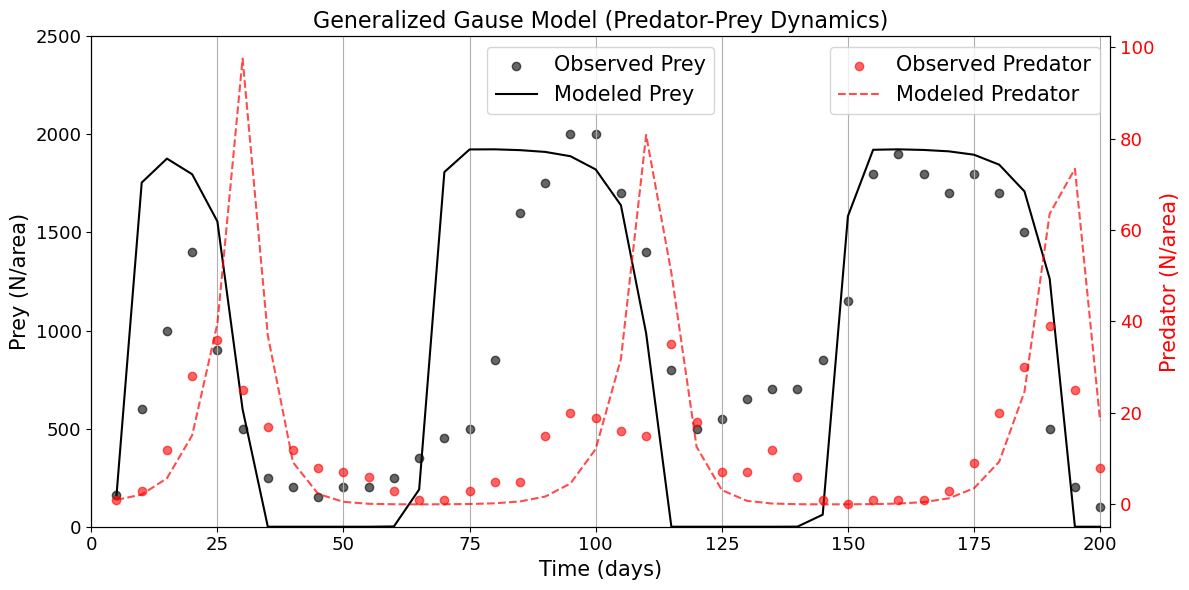

In [7]:
df = pd.read_csv('E:\OneDrive\EcoSysModel\data\ProblemSet2_Numbers_Table.csv', header=0, skiprows= [1] )

time_obs = df['Time'].values
prey_obs = df['Prey'].values
pred_obs = df['Predator'].values

# Initial conditions
X0 = prey_obs[0]  # Initial prey population based on observation
Y0 = pred_obs[0]   # Initial predator population based on observation
t_span = (time_obs[0], time_obs[-1])  # Time range
t_eval = np.linspace(time_obs[0], time_obs[-1], len(time_obs))  # Time points for evaluation

"""  Randomly choose the Parameters"""
r = 0.989   # Prey intrinsic growth rate
K = 1925  # Prey carrying capacity, this can get from the plot.
a = 0.1047    # Attack rate of predator
h = 0.0104    # Handling time
e = 0.0494   # Assimilation efficiency
gamma = 0.2783 # Predator mortality rate

testing = True

if testing:
    from scipy.integrate import solve_ivp
    # Define the Generalized Gause Model
    def ggm(t, z):
        X, Y = z  # Unpack prey (X) and predator (Y)
        # r, K, a, h, e, gamma = params
        g_X = r * (1 - X / K)  # Logistic growth
        p_X = (a * X) / (1 + h * X)  # Type II functional response
        q_X = e * p_X  # Assimilation into predator
    
        dXdt = X * g_X - Y * p_X  # Prey equation
        dYdt = Y * (-gamma + q_X)  # Predator equation
    
        return [dXdt, dYdt]
    """
    use solve_ivp to solve the equation
    """
    ## Solve the system
    solution = solve_ivp(ggm, t_span, [X0, Y0], t_eval=t_eval, method='RK45')
    # Extract results
    time = solution.t
    X, Y = solution.y

else:
    """ 
    use odeint function 
    """
    from scipy.integrate import odeint
    # Define the Generalized Gause Model
    def ggm(z, t, r, K, a, h, e, gamma): # z and t order are different from above
        X, Y = z  # Unpack prey (X) and predator (Y)
        # r, K, a, h, e, gamma = params
        g_X = r * (1 - X / K)  # Logistic growth
        p_X = (a * X) / (1 + h * X)  # Type II functional response
        q_X = e * p_X  # Assimilation into predator

        dXdt = X * g_X - Y * p_X  # Prey equation
        dYdt = Y * (-gamma + q_X)  # Predator equation

        return [dXdt, dYdt]

    solution = odeint(ggm, [X0, Y0], t_eval, args=(r, K, a, h, e, gamma))
    X, Y = solution[:, 0], solution[:, 1]

""" plot the result and overlay with observed data """

plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))  # Create main figure and first axis
ax1.scatter(time_obs, prey_obs, color=c[0], label='Observed Prey', alpha=0.6)
ax1.plot(time, X, marker= 'none', linestyle='-',color=c[0], label='Modeled Prey')
ax1.set_xlabel('Time (days)', fontsize=fs)
ax1.set_ylabel('Prey (N/area)', fontsize=fs, color=c[0])
ax1.tick_params(axis='y', labelcolor=c[0])  # Set tick colors to match the line
ax1.tick_params(axis='both', labelsize=13)
ax1.set_ylim(0, 2500)
ax1.set_xlim(0, 202)
ax1.grid(True, which='major', axis='x')

# Create second y-axis for Predator population
ax2 = ax1.twinx()
ax2.scatter(time_obs, pred_obs, color=c[1], label='Observed Predator', alpha=0.6)
ax2.plot(time, Y, marker= 'none', linestyle='dashed', color=c[1], alpha=0.7, label='Modeled Predator')
ax2.set_ylabel('Predator (N/area)', fontsize=fs, color=c[1])
ax2.tick_params(axis='y', labelcolor=c[1],labelsize=13)  # Set tick colors to match the line
# ax2.set_ylim(0, 50)

# Add legends
ax1.legend(loc='upper center', fontsize=fs)
ax2.legend(loc='upper right', fontsize=fs)
plt.title('Generalized Gause Model (Predator-Prey Dynamics)', fontsize=16)

plt.tight_layout()

plt.savefig(f'{fig_dir}/predtor_prey_obs_mod_test.png', bbox_inches='tight', dpi = 300)
plt.show()